In [0]:
import math
import random
from collections import Counter
from matplotlib import pyplot as plt

In [0]:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

def uniform_cdf(x):
    "returns the probability that a uniform random variable is <= x"
    if x < 0: return 0     # uniform random is never less than 0
    elif x < 1: return x   # eg (P X<=0.4) = 0.4
    else: return x         # uniform random is always less than 1

In [0]:
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return ( math.exp(-(x-mu)**2 / 2 / sigma**2) / (sqrt_two_pi * sigma) )

In [0]:
xs = [x / 10.0 for x in range(-50, 50)]

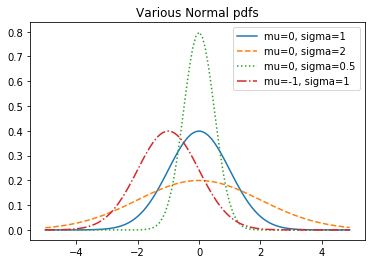

In [44]:
# Standard normal distribution
plt.plot(xs,[normal_pdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')

plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend(loc=1)
plt.title("Various Normal pdfs")
plt.show()

In [45]:
"""
When mu = 0 and sigma = 1, it's called the standard normal distribution

If Z is a standard normal variable then:
X = sigma * Z + mu  --> is also normal but with mu and sigma.

Conversely, if X is a normal random variable with mu and sigma
Z = (X - mu) / sigma
"""

"\nWhen mu = 0 and sigma = 1, it's called the standard normal distribution\n\nIf Z is a standard normal variable then:\nX = sigma * Z + mu  --> is also normal but with mu and sigma.\n\nConversely, if X is a normal random variable with mu and sigma\nZ = (X - mu) / sigma\n"

In [0]:
"""
The cumulative distribution function for the normal distribution
cannot be written in an "elementary" manner, but we can write
is using Python's math.erf:
"""

def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x-mu) / math.sqrt(2) / sigma)) / 2

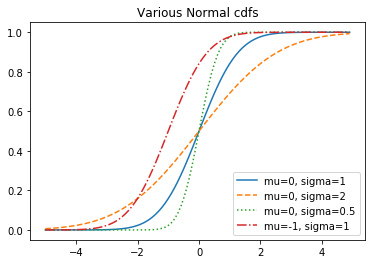

In [47]:
plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_cdf(x, mu=-1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend(loc=4)
plt.title("Various Normal cdfs")
plt.show()

In [0]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    # find approximate inverse using binary search
    
    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0          # normalcdf(-10) is (very close to) 0
    hi_z, hi_p = 10.0, 1             # normal_cdf(10) is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2   # consider the midpoint
        mid_p = normal_cdf(mid_z)    # and the cdf's value there
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break
    
    return mid_z

# The function repeatedly bisects intervals until it narrows in on a Z
    # that's close enough to the desied probability

In [0]:
# ENDED AT PAGE 124 normal cdfs

# **CENTRAL LIMIT THEOREM**

In [0]:
# Started at page 124

# Bernoulli distribution
# Binomial(n, p) - sum of n independent bernoulli(p) random variables

def bernoulli_trial(p):
    # return 1 with probability p
    # return 0 with probability 1-p
    return 1 if random.random() < p else 0

#random.random()

def binomial(n, p):
    # n --> is the number of independent bernoulli trials
    return sum(bernoulli_trial(p) for _ in range(n))

In [12]:
binomial(1000000000, 0.3)

299988538

In [0]:
def make_hist(p, n, num_points):
    data = [binomial(n, p) for _ in range(num_points)]

    # use a bar chart to show the actual binomial samples
    histogram = Counter(data)
    plt.bar([x for x in histogram.keys()], [v / num_points for v in histogram.values()], color='0.75')

    mu = p*n
    sigma = math.sqrt(n*p*(1-p))
    

    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs]
    plt.plot(xs, ys)
    plt.title("Binomial Distribution vs. Normal Approximation")

    plt.show()

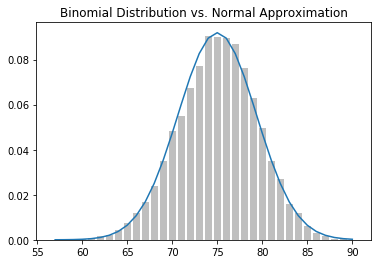

In [51]:
make_hist(0.75, 100, 10000)

# The moral of this approximation is that if you want to know the probability
#    that (say) a fair coin turns up more than 60 heads in 100 flips, you can estimate
#    it as the probability that a Normal(50, 5) is greater than 60
#    which is easier than computing the Binomial(100, 0.5)cdf
#    (Although in most applications you'd probably be using statistical software
#    that would gladly compute whatever probabilities that you want.)

**For Further Exploration**


*   [scipy.stats](http://bit.ly/1L2H0Lj) contains pdf and cdf functions for most 
of the popular probability
distributions.

*   Remember how, at the end of Chapter 5, I said that it would be a good idea to study a
statistics textbook? It would also be a good idea to study a probability textbook. The
best one I know that’s available online is Introduction to Probability.

